# `GUIDED PROJECT: ANALYZING eBay KLEINENZEIGEN CAR SALE DATA`
---
---

In this guided project, we'll work with a dataset of used cars from eBay Kleinanzeigen, a classifieds section of the German eBay website.

The dataset was originally scraped and uploaded to Kaggle, but in this project we're going to use a sample dataset with 50,000 data points that was prepared by dataquest.

The data dictionary provided with data is as follows:


|**Column**|**Description**
|-|-|
|dateCrawled| When this ad was first crawled. All field-values are taken from this date.
|name | Name of the car.
|seller | Whether the seller is private or a dealer.
|offerType | The type of listing
|price | The price on the ad to sell the car.
|abtest | Whether the listing is included in an A/B test.
|vehicleType | The vehicle Type.
|yearOfRegistration | The year in which the car was first registered.
|gearbox | The transmission type.
|powerPS | The power of the car in PS.
|model | The car model name.
|kilometer | How many kilometers the car has driven.
|monthOfRegistration | The month in which the car was first registered.
|fuelType | What type of fuel the car uses.
|brand | The brand of the car.
|notRepairedDamage | If the car has a damage which is not yet repaired.
|dateCreated | The date on which the eBay listing was created.
|nrOfPictures | The number of pictures in the ad.
|postalCode | The postal code for the location of the vehicle.
|lastSeenOnline | When the crawler saw this ad last online.

**The aim of this project is to clean the data and analyze the included used car listings. Also, we want to explore some of the unique benefits jupyter notebook provides for pandas. And of course, we want to have fun doing it!**

So let's get started. As usual, we'll start by importing libraries, reading the dataset, and doing some exploration

  # `Importing Libraries and Reading Data`
  ---

In [1]:
#Import pandas, NumPy, matplotlib.pyplot, and seaborn libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(font_scale=1.3)
sns.set_palette("pastel")
sns.set_style("white")

In [2]:
#Read autos.csv into pandas
autos =  pd.read_csv('autos.csv', encoding = 'Latin-1') 

#The default encoding = 'utf-8' doesn't work, so we had to try another encoding. In this case we use 'Latin-1'

# `Data Exploration: Overview`
---

In [3]:
# A neat feature of jupyter notebook is its ability 
#to render the first few and last few values of any pandas object.
autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,0,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,0,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,0,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,0,35683,2016-04-05 16:45:07


In [4]:
autos.info() # print information about the autos dataframe
autos.head() #print first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


## Hmmm interesting dataset. We notice several things here:

- Column names use camelCase instead of Python's preferred snake_case. We're going to rename the column names so all of <br>&nbsp;them are on snake_case
- A lot of German words (well, it's from German eBay website). We're going to translate the words for better understanding.
- There are 20 columns, most of which are strings. We're going to convert some of the strings column to numeric when <br>&nbsp;necessary.
- Some columns have null values (based on **autos.info()**), but all 20 columns have at least 80% non-null values. This is fine, we don't need to remove the null rows from the column.
<br>* *note: we know this by looking at **autos.info()**, RangeIndex is 50,000 entries, and  column with the least amount of non-null count is notRepairedDamage, 
<br>&nbsp;&nbsp;with 40,171.*

**So what are waiting for? Let's clean the dataset!**

# `Data Cleaning`
---

## Clean column names: camelCase --> snake_case

Let's convert the column names from camelcase to snakecase and reword some of the column names based on the data dictionary to be more descriptive.

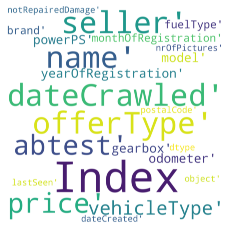

In [5]:
#Honestly, this is totally unnecessary. 
#However, I just learned about wordcloud and it looks cool! 
#So let's have a little fun and use it ;D

#Displaying the column names using wordcloud
#as you can see below, they are still on camelCase

# Libraries
from wordcloud import WordCloud
 
# Create a list of word
text= str(autos.columns)
 
# Create the wordcloud object
wordcloud = WordCloud(width=4128, height=4128, margin=0, background_color="white").generate(text)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [6]:
#print an array of the existing column names.
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [7]:
#rename the columns
autos.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen']

In [8]:
#verify the change
autos.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

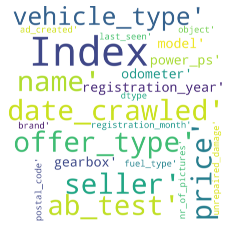

In [9]:
#Displaying column names on snake_case

# Libraries
from wordcloud import WordCloud
 
# Create a list of word
text= str(autos.columns)
 
# Create the wordcloud object
wordcloud = WordCloud(width=4128, height=4128, margin=0, background_color="white").generate(text)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

**As we can see, now the column names are on snake_case format. Woohoo! Next!**

## Cleaning columns with German words

It is a shame that I don't speak German. I need to take some class to understand some of the words in this dataset. :(
<br>But luckily, there is google translate! So by using google translate, I am going to translate all the German words in this dataset to English

In [10]:
#print the unique values of all column
#to figure out what needs to be changed

columns= ['seller', 'offer_type', 'vehicle_type', 'gearbox', 'unrepaired_damage', 'fuel_type' ]

for column in columns:
    print(column)
    print(autos[column].unique())
    print('\n')

seller
['privat' 'gewerblich']


offer_type
['Angebot' 'Gesuch']


vehicle_type
['bus' 'limousine' 'kleinwagen' 'kombi' nan 'coupe' 'suv' 'cabrio'
 'andere']


gearbox
['manuell' 'automatik' nan]


unrepaired_damage
['nein' nan 'ja']


fuel_type
['lpg' 'benzin' 'diesel' nan 'cng' 'hybrid' 'elektro' 'andere']




In [11]:
#TRANSLATE: replace the values (German : English) with mapping dict

columns= ['seller', 'offer_type', 'vehicle_type', 'gearbox', 'unrepaired_damage', 'fuel_type' ]
translation={'privat':'private', 'gewerblich': 'commercial', #seller
             'Angebot': 'offer', 'Gesuch': 'request',        #offer_type
             'kleinwagen': 'small car', 'kombi': 'wagon',
             'cabrio': 'convertible', 'andere': 'other',     #vehicle_type
             'manuell': 'manual', 'automatik': 'automatic',
             'cabrio': 'convertible',                        #gearbox
             'nein': 'no', 'ja': 'yes',                      #unrepaired_damage
             'benzin': 'gas', 'elektro': 'electric'}         #fuel_type
autos[columns]= autos[columns].replace(translation)

In [12]:
#verify the change
#by printing the unique values again
columns= ['seller', 'offer_type', 'vehicle_type', 'gearbox', 'unrepaired_damage', 'fuel_type' ]

for column in columns:
    print(column)
    print(autos[column].unique())
    print('\n')

seller
['private' 'commercial']


offer_type
['offer' 'request']


vehicle_type
['bus' 'limousine' 'small car' 'wagon' nan 'coupe' 'suv' 'convertible'
 'other']


gearbox
['manual' 'automatic' nan]


unrepaired_damage
['no' nan 'yes']


fuel_type
['lpg' 'gas' 'diesel' nan 'cng' 'hybrid' 'electric' 'other']




**Alright! So we have translated all the German words!**
<br> Now we have a better understanding of the dataset, which will help us when we explore the dataset even further, and do our analysis

Onto the next one!

## Cleaning odometer and price columns (part 1): Removing non-numeric characters and converting string column to int 

**By looking at the table above, we can see that odometer and price columns are numeric values stored as text (we can see that on the row 'top' above, price has '$ and'odometer has 'km').**

We don't want odometer and price columns to be string, because we won't be able to sort it. So you know what? let's clean those columns! Remove the non-numeric characters and convert the data types of those two columns to int.

In [13]:
print(autos.dtypes) #verify data types

date_crawled          object
name                  object
seller                object
offer_type            object
price                 object
ab_test               object
vehicle_type          object
registration_year      int64
gearbox               object
power_ps               int64
model                 object
odometer              object
registration_month     int64
fuel_type             object
brand                 object
unrepaired_damage     object
ad_created            object
nr_of_pictures         int64
postal_code            int64
last_seen             object
dtype: object


In [14]:
#print the unique values of all column
#to figure out what needs to be changed

columns= ['price', 'odometer']

for column in columns:
    print('-' + column + '-')
    print(autos[column].unique())
    print('\n')

-price-
['$5,000' '$8,500' '$8,990' ... '$385' '$22,200' '$16,995']


-odometer-
['150,000km' '70,000km' '50,000km' '80,000km' '10,000km' '30,000km'
 '125,000km' '90,000km' '20,000km' '60,000km' '5,000km' '100,000km'
 '40,000km']




In [15]:
#Replace the non-numeric characters, then print unique values to verify the change
columns= ['price', 'odometer']

for column in columns:
    autos[column] = (autos[column].str.replace('$','')
                                .str.replace('km','')
                                .str.replace(',','')
                                .astype(int)
                    )
    print('-' + column + '-')
    print(autos[column].unique())
    print('\n')

-price-
[ 5000  8500  8990 ...   385 22200 16995]


-odometer-
[150000  70000  50000  80000  10000  30000 125000  90000  20000  60000
   5000 100000  40000]




In [16]:
#rename columns
autos.rename({"odometer": "odometer_km"}, axis = 1, inplace = True)
autos.rename({"price": "price_usd"}, axis = 1, inplace = True)

In [17]:
autos.describe(include = 'all') #verify the changes

,date_crawled,name,seller,offer_type,price_usd,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,5.000000e+04,50000,44905,50000.000000,47320,50000.000000,47242,50000.000000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,NaN,2,8,NaN,2,NaN,245,NaN,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-09 11:54:38,Ford_Fiesta,private,offer,NaN,test,limousine,NaN,manual,NaN,golf,NaN,NaN,gas,volkswagen,no,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,NaN,25756,12859,NaN,36993,NaN,4024,NaN,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,9.840044e+03,NaN,NaN,2005.073280,NaN,116.355920,NaN,125732.700000,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,4.811044e+05,NaN,NaN,105.712813,NaN,209.216627,NaN,40042.211706,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,1.100000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


## Buckle up, take a deep breath! Before we move on, let's do a little reflection of what we have done.

**Up until this point, we've done the following:**

- Cleaned column names: camelcase --> snakecase
- Cleaned columns with German words
- Cleaned odometer and price columns
    - Removed non-numeric characters
    - Converted columns to int
    - Renamed columns

Let's continue exploring and cleaning the dataset, specifically looking for data that doesn't look right. For now, we'll continue working on the odometer_km and price columns. 

**We're going to analyze the columns using minimum and maximum values and look for outliers that we might want to remove.**

## Cleaning odometer_km and price_usd columns (part 2): Removing outliers 

**`autos["price_usd"]`**

In [18]:
print('-nunique-')
print(autos["price_usd"].nunique()) #to see how many unique values
print('\n')
print('-describe-')
print(autos["price_usd"].describe()) #to view min/max/median/mean etc

-nunique-
2357


-describe-
count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price_usd, dtype: float64


In [19]:
# count unique values of the 50 highest prices

autos["price_usd"].value_counts().sort_index(ascending= False).head(50)

#note: Series.value_counts() returns a series

99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
350000      1
345000      1
299000      1
295000      1
265000      1
259000      1
250000      1
220000      1
198000      1
197000      1
194000      1
190000      1
180000      1
175000      1
169999      1
169000      1
163991      1
163500      1
155000      1
151990      1
145000      1
139997      1
137999      1
135000      1
130000      1
129000      1
128000      1
120000      2
119900      1
119500      1
116000      1
115991      1
115000      1
114400      1
109999      1
105000      2
104900      1
99900       2
99000       2
98500       1
Name: price_usd, dtype: int64

In [20]:
# count unique values of the 50 lowest prices

autos["price_usd"].value_counts().sort_index(ascending= False).tail(50)

140       9
139       1
135       1
130      15
129       1
125       8
122       1
120      39
117       1
115       2
111       2
110       3
100     134
99       19
90        5
89        1
80       15
79        1
75        5
70       10
66        1
65        5
60        9
59        1
55        2
50       49
49        4
47        1
45        4
40        6
35        1
30        7
29        1
25        5
20        4
18        1
17        3
15        2
14        1
13        2
12        3
11        2
10        7
9         1
8         1
5         2
3         1
2         3
1       156
0      1421
Name: price_usd, dtype: int64

**If we look at the two series above, it appears that the outliers are listings with price \\$0, and everything above \\$350,000.**

We want to remove \\$0, because giving a car to strangers for free doesn't seem realistic at this day and age, right? :P <br>Also, we want to remove rows with prices > \\$350,000, because after \\$350,000 the prices that follows jumped significantly higher, which also doesn't seeem natural. 

*note: cars with really low price (e.g. below \\$10) makes sense, because eBay is an auction site. So we're going to keep it. Most likely the really low prices are just the starting bid.

In [21]:
#removing outliers
autos = autos[autos["price_usd"].between(1, 350000)]

In [22]:
#verify change
print('-head-')
print(autos["price_usd"].value_counts().sort_index(ascending= False).head())
print('\n')
print('-tail-')
print(autos["price_usd"].value_counts().sort_index(ascending= False).tail())
print('\n')
print('-nunique-')
print(autos["price_usd"].nunique())
print('\n')
print('-describe-')
print(autos["price_usd"].describe())

-head-
350000    1
345000    1
299000    1
295000    1
265000    1
Name: price_usd, dtype: int64


-tail-
8      1
5      2
3      1
2      3
1    156
Name: price_usd, dtype: int64


-nunique-
2346


-describe-
count     48565.000000
mean       5888.935591
std        9059.854754
min           1.000000
25%        1200.000000
50%        3000.000000
75%        7490.000000
max      350000.000000
Name: price_usd, dtype: float64


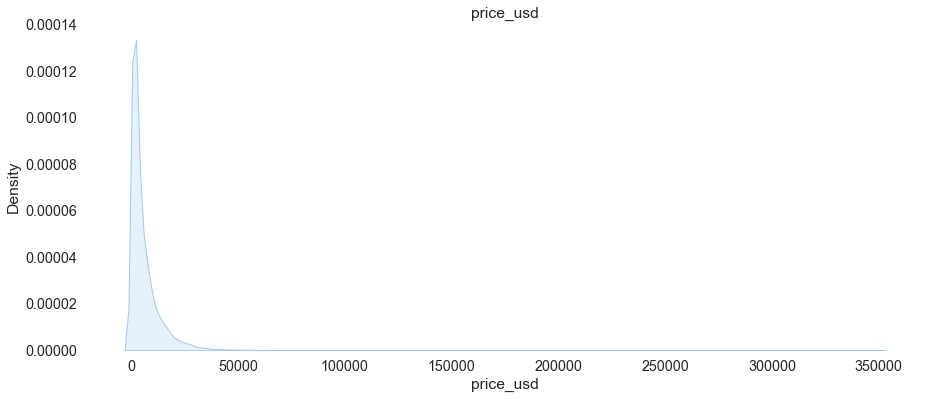

In [23]:
#understanding the distribution of price_usd values using kdeplot

fig, ax =plt.subplots(1,1,figsize=(15,6))
plt.title('price_usd')
sns.kdeplot(autos["price_usd"], shade= True)

sns.despine(left=True, bottom=True)

**Outliers on price_usd column has been removed. Yay! Now the column only contains car with price between \\$1 and \\$350,000**
<br>Let's move on!

**`autos["odometer_km"]`**

In [24]:
print('-nunique-')
print(autos["odometer_km"].nunique())
print('\n')
print('-desribe-')
print(autos["odometer_km"].describe())

-nunique-
13


-desribe-
count     48565.000000
mean     125770.101925
std       39788.636804
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64


In [25]:
print(autos["odometer_km"].value_counts().sort_index(ascending= False))

150000    31414
125000     5057
100000     2115
90000      1734
80000      1415
70000      1217
60000      1155
50000      1012
40000       815
30000       780
20000       762
10000       253
5000        836
Name: odometer_km, dtype: int64


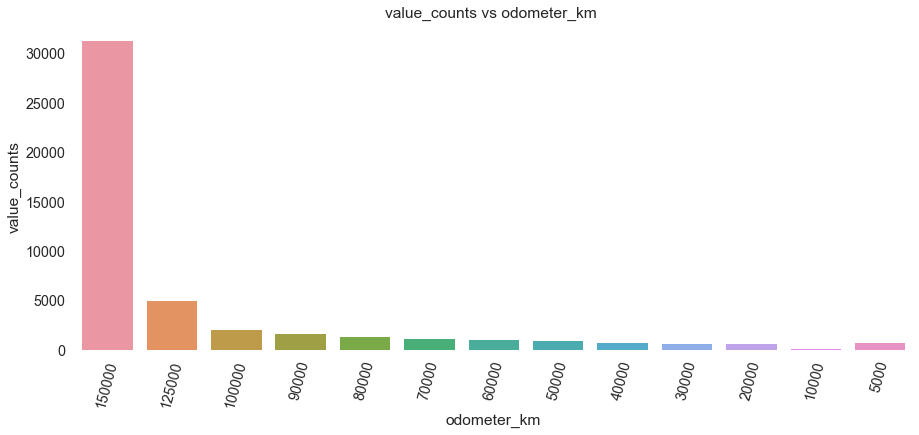

In [26]:
#display odometer_km values in descending order of #values 
#by using barplot

odometer_km = autos["odometer_km"].value_counts().sort_index(ascending= False)

fig, ax =plt.subplots(1,1,figsize=(15,6))
plt.title('value_counts vs odometer_km ')
plt.xlabel('odometer_km')
plt.ylabel('value_counts')
sns.barplot(x=odometer_km.index.sort_values(), y=odometer_km.unique(), 
            data=autos, ci=None).set_xticklabels(labels=odometer_km.index,rotation=75)

sns.despine(left=True, bottom=True)

**There doesn't seem to be any outlier in odometer_km column. Everything is good. So we'll just leave it at that. Next!**

## Cleaning & exploring date columns

Let's now move on to the date columns and understand the date range the data covers.

There are 5 columns that should represent date values. Some of these columns were created by the crawler, some came from the website itself. We can differentiate by referring to the data dictionary:

- `date_crawled`: added by the crawler
- `last_seen`: added by the crawler
- `ad_created`: from the website
- `registration_month`: from the website
- `registration_year`: from the website

Right now, the **date_crawled, last_seen, and ad_created columns are all identified as string values** by pandas. Because these three columns are represented as strings, we need to **convert the data into a numerical representation so we can understand it quantitatively**. The other two columns are represented as numeric values, so we can use methods like Series.describe() to understand the distribution without any extra data processing.

**Let's first understand how the values in the three string columns are formatted. These columns all represent full timestamp values:**

In [27]:
autos[['date_crawled','ad_created','last_seen']][0:5]

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


**We notice that the first 10 characters represent the date (e.g. 2016-03-12). To understand the date range, we can extract just the date values, use Series.value_counts() to generate a distribution, and then sort by the index.**

**Let's extract the date values!**
To select the first 10 characters in each column, we can use Series.str[:10]:

**`dateof_date_crawled`**

In [28]:
from pandas import to_datetime #importing to_datetime so we don't have to use pd.to_datetime to call it

dateof_date_crawled = to_datetime(autos['date_crawled'].str[:10])
print('-dateof_date_crawled-')
print(dateof_date_crawled)

#we're using to_datetime so that we can access any datetime property

-dateof_date_crawled-
0       2016-03-26
1       2016-04-04
2       2016-03-26
3       2016-03-12
4       2016-04-01
           ...    
49995   2016-03-27
49996   2016-03-28
49997   2016-04-02
49998   2016-03-08
49999   2016-03-14
Name: date_crawled, Length: 48565, dtype: datetime64[ns]


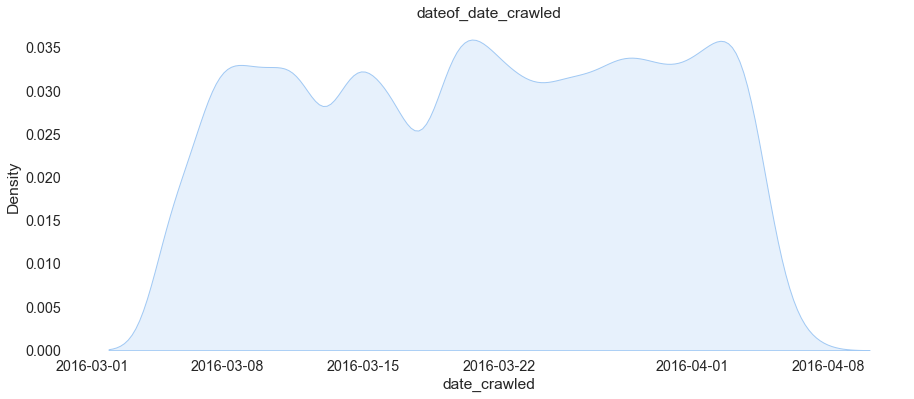

In [29]:
#understanding the distribution of dateof_date_crawled using kdeplot

fig, ax =plt.subplots(1,1,figsize=(15,6))
#sns.set(font_scale=1.3)
plt.title('dateof_date_crawled')
sns.kdeplot(dateof_date_crawled, shade= True)

sns.despine(left=True, bottom=True)

**`dateof_ad_created`**

In [30]:
dateof_ad_created = to_datetime(autos['ad_created'].str[:10])
print('-dateof_ad_created-')
print(dateof_ad_created)

-dateof_ad_created-
0       2016-03-26
1       2016-04-04
2       2016-03-26
3       2016-03-12
4       2016-04-01
           ...    
49995   2016-03-27
49996   2016-03-28
49997   2016-04-02
49998   2016-03-08
49999   2016-03-13
Name: ad_created, Length: 48565, dtype: datetime64[ns]


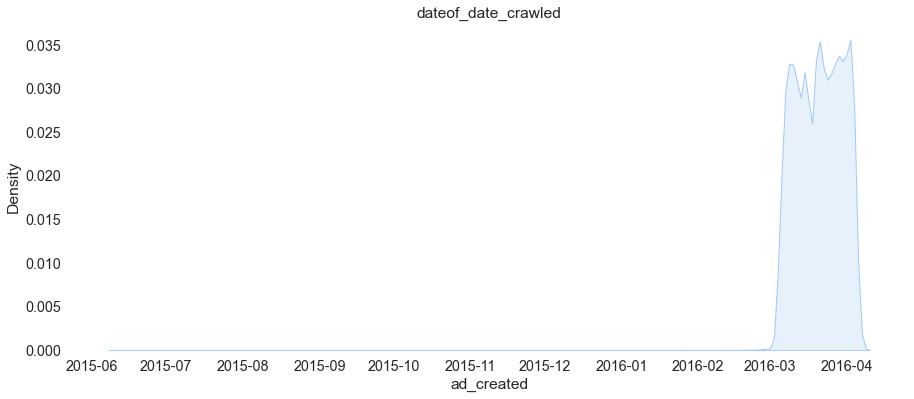

In [31]:
#understanding the distribution of dateof_date_crawled using kdeplot

fig, ax =plt.subplots(1,1,figsize=(15,6))
plt.title('dateof_date_crawled')
sns.kdeplot(dateof_ad_created, shade= True)

sns.despine(left=True, bottom=True)

**`dateof_last_seen`**

In [32]:
dateof_last_seen = to_datetime(autos['last_seen'].str[:10])
print('-dateof_last_seen-')
print(dateof_last_seen)

-dateof_last_seen-
0       2016-04-06
1       2016-04-06
2       2016-04-06
3       2016-03-15
4       2016-04-01
           ...    
49995   2016-04-01
49996   2016-04-02
49997   2016-04-04
49998   2016-04-05
49999   2016-04-06
Name: last_seen, Length: 48565, dtype: datetime64[ns]


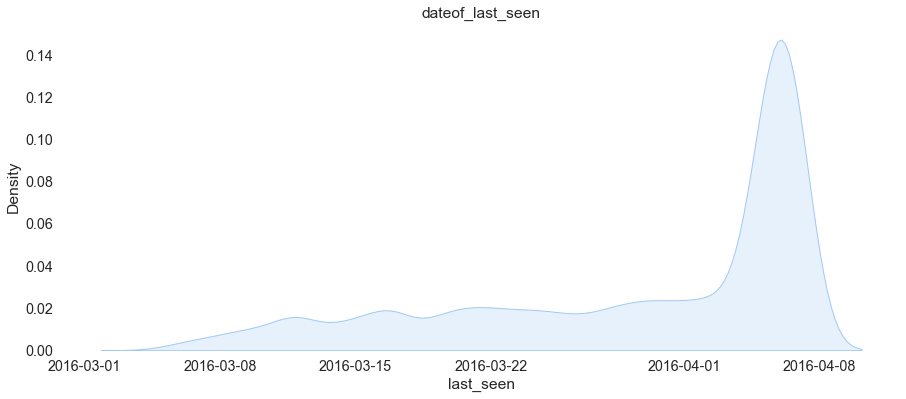

In [33]:
#understanding the distribution of dateof_date_crawled using kdeplot

fig, ax =plt.subplots(1,1,figsize=(15,6))
#sns.set(font_scale=1.3)
plt.title('dateof_last_seen')
sns.kdeplot(dateof_last_seen, shade= True)

sns.despine(left=True, bottom=True)

**Almost done with data cleaning, almost! But for now, let's explore the dates and registration_year column even further to understand the data distribution**

## Exploring date_crawled, ad_created, and last_seen columns: calculating the distribution of values

**`dateof_date_crawled`**

In [34]:
#using sort_index we rank the date from most common to least common (based on percentage)

dateof_date_crawled.value_counts(normalize=True, dropna=False).sort_index

#Series.value_counts(normalize=True, dropna=False) is used 
#to include missing values in the distribution 
#and to use percentages instead of counts

<bound method Series.sort_index of 2016-04-03    0.038608
2016-03-20    0.037887
2016-03-21    0.037373
2016-03-12    0.036920
2016-03-14    0.036549
2016-04-04    0.036487
2016-03-07    0.036014
2016-04-02    0.035478
2016-03-28    0.034860
2016-03-19    0.034778
2016-03-15    0.034284
2016-03-29    0.034099
2016-03-30    0.033687
2016-04-01    0.033687
2016-03-08    0.033296
2016-03-09    0.033090
2016-03-22    0.032987
2016-03-11    0.032575
2016-03-23    0.032225
2016-03-26    0.032204
2016-03-10    0.032184
2016-03-31    0.031834
2016-03-17    0.031628
2016-03-25    0.031607
2016-03-27    0.031092
2016-03-16    0.029610
2016-03-24    0.029342
2016-03-05    0.025327
2016-03-13    0.015670
2016-03-06    0.014043
2016-04-05    0.013096
2016-03-18    0.012911
2016-04-06    0.003171
2016-04-07    0.001400
Name: date_crawled, dtype: float64>

**2016-04-03** makes up most of the data in the date_crawled column, with 3.8%

**`dateof_ad_created`**

In [35]:
dateof_ad_created.value_counts(normalize=True, dropna=False).sort_index

<bound method Series.sort_index of 2016-04-03    0.038855
2016-03-20    0.037949
2016-03-21    0.037579
2016-04-04    0.036858
2016-03-12    0.036755
                ...   
2015-11-10    0.000021
2016-02-01    0.000021
2016-02-07    0.000021
2015-06-11    0.000021
2015-12-30    0.000021
Name: ad_created, Length: 76, dtype: float64>

**2016-04-03** makes up most of the data in the ad_created column, with 3.8%

One interesting thing: the most common dates for `dateof_date_crawled` and `dateof_ad_created` are **2016-04-03**, which seem to suggest that the dates on dateof_ad_created is NOT the actual date ads were created. It is more than likely that most ads were created before the dates listed on dateof_ad_created.

**`dateof_last_seen`**

In [36]:
dateof_last_seen.value_counts(normalize=True, dropna=False).sort_index

<bound method Series.sort_index of 2016-04-06    0.221806
2016-04-07    0.131947
2016-04-05    0.124761
2016-03-17    0.028086
2016-04-03    0.025203
2016-04-02    0.024915
2016-03-30    0.024771
2016-04-04    0.024483
2016-03-31    0.023783
2016-03-12    0.023783
2016-04-01    0.022794
2016-03-29    0.022341
2016-03-22    0.021373
2016-03-28    0.020859
2016-03-20    0.020653
2016-03-21    0.020632
2016-03-24    0.019767
2016-03-25    0.019211
2016-03-23    0.018532
2016-03-26    0.016802
2016-03-16    0.016452
2016-03-15    0.015876
2016-03-19    0.015834
2016-03-27    0.015649
2016-03-14    0.012602
2016-03-11    0.012375
2016-03-10    0.010666
2016-03-09    0.009595
2016-03-13    0.008895
2016-03-08    0.007413
2016-03-18    0.007351
2016-03-07    0.005395
2016-03-06    0.004324
2016-03-05    0.001071
Name: last_seen, dtype: float64>

**2016-04-06** makes up most of the data in the last_seen column, with 22.2%

## Creating a new column: 
**`turnaround_time` --> `autos['turnaround_time_days']`**

In [37]:
#using the assumption that all values of dateof_ad_created consist of the actual date the ads are created 
#and that all values of dateof_last_seen reflects that date the car was sold,
#we calculate the turnaround time by taking the difference of the two

turnaround_time = dateof_last_seen - dateof_ad_created
turnaround_time.value_counts(normalize=True, dropna=False).sort_index

#note that this is why we need to_datetime, otherwise we won't be able to use substraction operator(-)

<bound method Series.sort_index of 0 days      0.139298
2 days      0.104170
4 days      0.074436
1 days      0.057737
6 days      0.055699
              ...   
63 days     0.000021
239 days    0.000021
109 days    0.000021
70 days     0.000021
62 days     0.000021
Length: 68, dtype: float64>

Just a quick note here, can see that the top three most common turnaround time are 0 days, 2 days, and 4 days. This is interesting, but we want more insights! so let's to create a new column that will be useful for later analysis.

**`turnaround_time_days`**

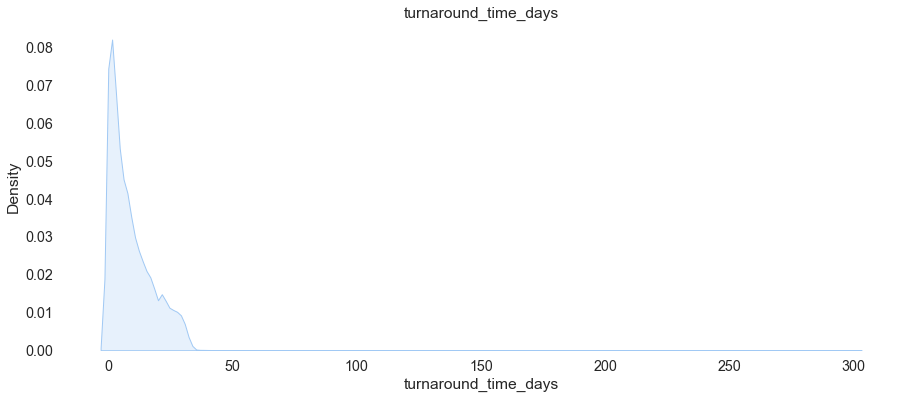

In [79]:
#create a new column in the DataFrame

autos['turnaround_time_days']= turnaround_time.copy().astype(str).str.split().str[0].astype(int)

#understanding the distribution of dateof_date_crawled using kdeplot

fig, ax =plt.subplots(1,1,figsize=(15,6))
#sns.set(font_scale=1.3)
plt.title('turnaround_time_days')
sns.kdeplot(autos['turnaround_time_days'], shade= True)

sns.despine(left=True, bottom=True)

In [39]:
autos.head(5) #verify the change

#we converted turnaround_time to numeric, then add it to a new column called turnaround_time_days

,date_crawled,name,seller,offer_type,price_usd,ab_test,vehicle_type,registration_year,gearbox,power_ps,...,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen,turnaround_time_days
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,private,offer,5000,control,bus,2004,manual,158,...,150000,3,lpg,peugeot,no,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54,11
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,private,offer,8500,control,limousine,1997,automatic,286,...,150000,6,gas,bmw,no,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08,2
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,private,offer,8990,test,limousine,2009,manual,102,...,70000,7,gas,volkswagen,no,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37,11
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,private,offer,4350,control,small car,2007,automatic,71,...,70000,6,gas,smart,no,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28,3
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,private,offer,1350,test,wagon,2003,manual,0,...,150000,7,gas,ford,no,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50,0


**All is good on the date columns. Next!**

## Cleaning & exploring registration_year column: understanding the data distribution

In [40]:
autos['registration_year'].describe()

count    48565.000000
mean      2004.755421
std         88.643887
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

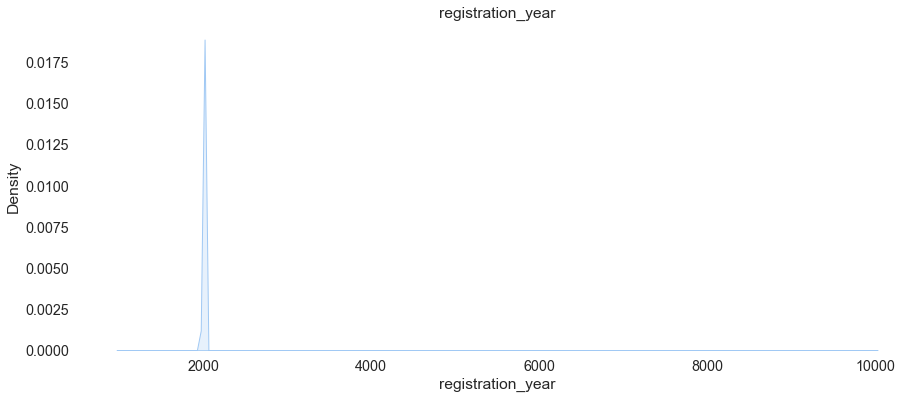

In [41]:
#understanding the distribution of registration_year

fig, ax =plt.subplots(1,1,figsize=(15,6))
#sns.set(font_scale=1.3)
plt.title('registration_year')
sns.kdeplot(autos['registration_year'], shade= True)

sns.despine(left=True, bottom=True)

## Huh?! what ...? if you're confused looking at the distribution of registration year, you're not alone...

**The minimum value is 1000 ?!** Which means the car was produced and registered in the year 1000?! Really ? Car didn't even exist yet.
<br>*Correct me if I'm wrong, but I don't even think there is any road that was built for cars at that time. So this definitely doesn't make sense.

**The maximum value is 9999 -___-'** which makes even less sense.
<br>*I mean this dataset is from 2016. How could it be that there is a used car that comes from the future? But you know what, let's not dwell on this even further.

**It's time to clean the data!**

**So since there are odd values in the dataset, we will remove a few rows:**
* Since this dataset is from 2016, then we will only include cars up until 2016. 
* I did a little googling for "the first car ever", and turns out the birth certificate of automobile is at year 1886. The car is called *Benz Patent Motor Car, model no. 1*, which was invented by Carl Benz. This car was not sold to general public at the time of the invention, but maybe there is someone that owns this particular car and wants to sell it on Ebay. Who knows? So without overthinking, let's set the earliest year to 1886


* **TL;DR: we'll only incude cars with registration year between 1886 and 2016**

Before we remove the rows, let's check the relative frequency of cars with a registration year that fall outside of the 1886 - 2016 interval and see if it's safe to remove those rows entirely, or if we need more custom logic..

In [42]:
#check relative frequency using boolean filtering
(~autos["registration_year"].between(1886, 2016)).value_counts(normalize=True, dropna=False)

False    0.961207
True     0.038793
Name: registration_year, dtype: float64

**True = 0.039, which means that cars with a registration year that fall outside of the 1886 - 2016 interval only make up 3.9% of the total rows. This is only a small percentage, so we can remove them.**

In [43]:
print('-Before-')
print(autos["registration_year"].describe()) #before change
print('\n')
autos = autos[autos["registration_year"].between(1886, 2016)] #removing odd rows
print('-After-')
print(autos["registration_year"].describe()) #verify change

-Before-
count    48565.000000
mean      2004.755421
std         88.643887
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64


-After-
count    46681.000000
mean      2002.910756
std          7.185103
min       1910.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       2016.000000
Name: registration_year, dtype: float64


In [44]:
#calculate the distribution of the remaining values
print('-head-')
print(autos["registration_year"].value_counts(normalize=True).head(10).sort_index)
print('\n')
print('-tail-')
print(autos["registration_year"].value_counts(normalize=True).tail(10).sort_index)

-head-
<bound method Series.sort_index of 2000    0.067608
2005    0.062895
1999    0.062060
2004    0.057904
2003    0.057818
2006    0.057197
2001    0.056468
2002    0.053255
1998    0.050620
2007    0.048778
Name: registration_year, dtype: float64>


-tail-
<bound method Series.sort_index of 1955    0.000043
1953    0.000021
1943    0.000021
1929    0.000021
1939    0.000021
1938    0.000021
1948    0.000021
1927    0.000021
1931    0.000021
1952    0.000021
Name: registration_year, dtype: float64>


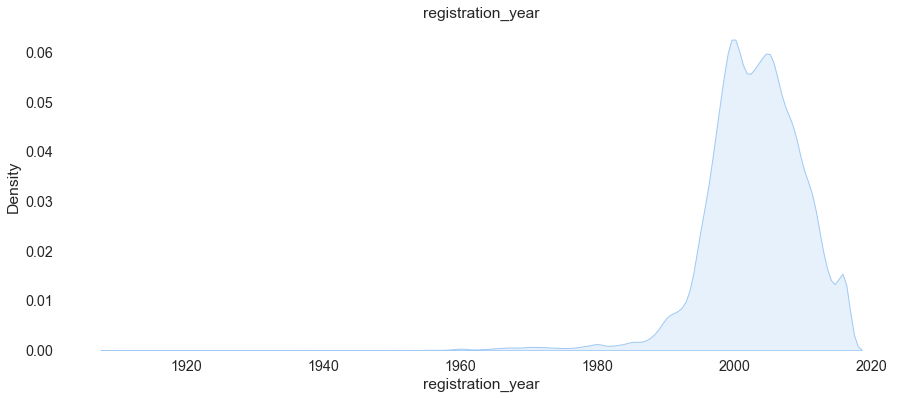

In [45]:
#new distribution of registration_year

fig, ax =plt.subplots(1,1,figsize=(15,6))
#sns.set(font_scale=1.3)
plt.title('registration_year')
sns.kdeplot(autos['registration_year'], shade= True)

sns.despine(left=True, bottom=True)

So based on the data distribution we can see that in this dataset:
* The **most common** cars  come from the year **around 1998 - 2007**
* The **least common** cars come from the year **1927 - 1953**

## As we all know, data scientists spend 80% of the time cleaning data, and at this point we're at 79.99%

**We have cleaned the dataset, and we can start doing more analysis in this dataset. However, before we move on let's take a small break and do another reflection on what we have done in this project. So... have done the following:**

- Cleaned column names: camelcase --> snakecase
- Cleaned columns with German words
- Cleaned odometer and price columns
    - Removed non-numeric characters
    - Converted columns to int
    - Renamed columns
    - Removed outliers
- Cleaned date columns (date_crawled, ad_created, and last_seen)
- Explored date columns & understood the distribution of values
- Cleaned & explored registration_year column

**We did most of our chore (data cleaning), now the super fun part begins! We'll start analyzing data and creating insights! Oh I'm excited :D**

# `Analyzing Data & Creating Insights`
---

One of the analysis techniques we learned in this course is **aggregation**. When working with data on cars, it's natural to explore variations across different car brands. **We can use aggregation to understand the brand column.**

**How do we do aggregation? Here are the steps:**

- Identify the unique values we want to aggregate by
- Create an empty dictionary to store our aggregate data
- Loop over the unique values, and for each:
    - Subset the dataframe by the unique values
    - Calculate the mean of whichever column we're interested in
    - Assign the val/mean to the dict as k/v

## Analyzing brand column: Finding the correlation between price and odometer_km (mileage) between top brands. 

**`brands_freq`**

In [46]:
#Identify the unique values we want to aggregate by

brands_freq = autos["brand"].value_counts(normalize=True, dropna=False) 
brands_freq

#We explore the unique values in the brand column, and calculate the relative frequency

volkswagen        0.211264
bmw               0.110045
opel              0.107581
mercedes_benz     0.096463
audi              0.086566
ford              0.069900
renault           0.047150
peugeot           0.029841
fiat              0.025642
seat              0.018273
skoda             0.016409
nissan            0.015274
mazda             0.015188
smart             0.014160
citroen           0.014010
toyota            0.012703
hyundai           0.010025
sonstige_autos    0.009811
volvo             0.009147
mini              0.008762
mitsubishi        0.008226
honda             0.007840
kia               0.007069
alfa_romeo        0.006641
porsche           0.006127
suzuki            0.005934
chevrolet         0.005698
chrysler          0.003513
dacia             0.002635
daihatsu          0.002506
jeep              0.002271
subaru            0.002142
land_rover        0.002099
saab              0.001649
jaguar            0.001564
daewoo            0.001500
trabant           0.001392
r

**Display brands_freq in descending order of relative frequency**

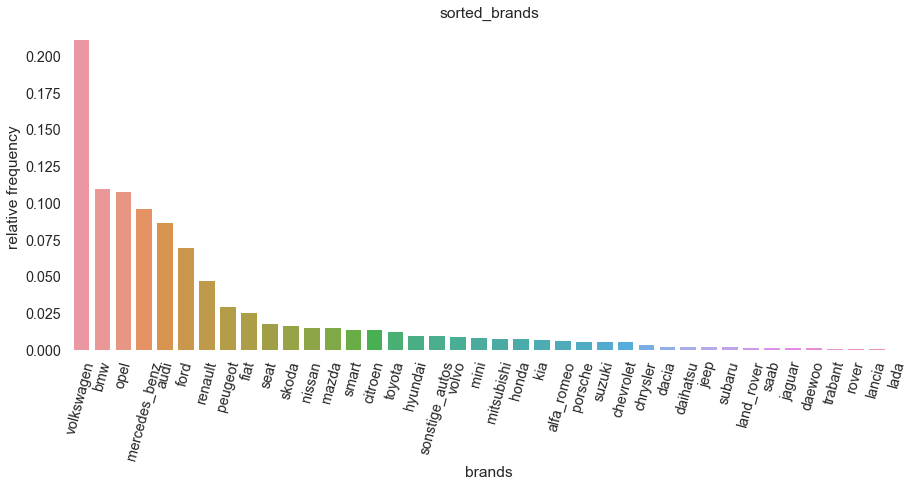

In [47]:
#understanding the distribution of brand column using barplot


sorted_brands = brands_freq.sort_values(ascending= False)

fig, ax =plt.subplots(1,1,figsize=(15,6))
plt.title('sorted_brands')
plt.xlabel('brands')
plt.ylabel('relative frequency')
sns.barplot(x=sorted_brands.sort_values().
            index, y=sorted_brands.unique(), data=autos, ci=None).set_xticklabels(labels=sorted_brands
                                                                                  .index,rotation=75)

sns.despine(left=True, bottom=True)

**`top_brands`**
<br> **Brands that have relative frequency > 5%**

In [48]:
top_brands = brands_freq[brands_freq > .05]
print(top_brands)

volkswagen       0.211264
bmw              0.110045
opel             0.107581
mercedes_benz    0.096463
audi             0.086566
ford             0.069900
Name: brand, dtype: float64


**Display top_brands in descending order of relative frequency**

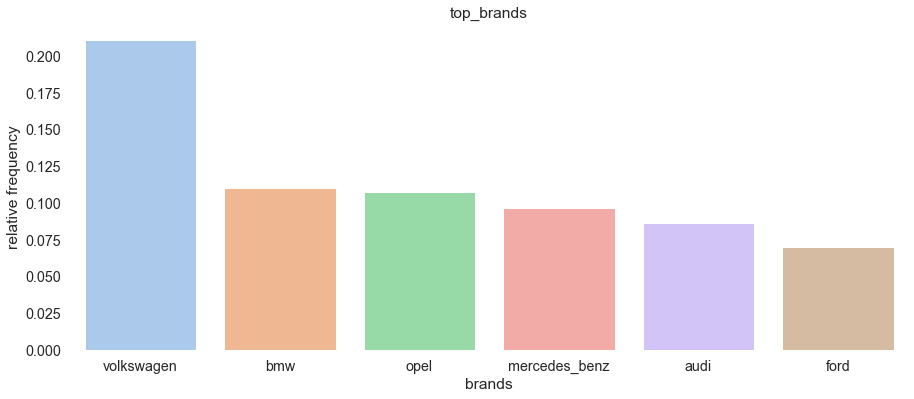

In [49]:
#understanding the distribution of top_brands using barplot

sorted_top_brands = top_brands.sort_values(ascending= False)

fig, ax =plt.subplots(1,1,figsize=(15,6))
plt.title('top_brands')
plt.xlabel('brands')
plt.ylabel('relative frequency')
sns.barplot(x=sorted_top_brands.sort_values(ascending= False).
            index, y=sorted_top_brands.unique(), data=autos, ci=None)

sns.despine(left=True, bottom=True)

**`top_brands_price`**

In [50]:
top_brands_price = {} #Create an empty dictionary to store our aggregate data

for b in top_brands.index: # Loop over the unique values, and for each:
    selected_rows = autos[autos["brand"] == b ] #Subset the dataframe by the unique values using boolean comparison
    mean_price = selected_rows["price_usd"].mean() #Calculate the mean of whichever column we're interested in
    top_brands_price[b] = int(mean_price) #Assign the val/mean to the dict as k/v

#print in descending order
sorted_top_brands_price = sorted(top_brands_price.items() , reverse=True, key=lambda x: x[1])

for element in sorted_top_brands_price :
    print(element[0] , " :" , element[1] )   

audi  : 9336
mercedes_benz  : 8628
bmw  : 8332
volkswagen  : 5402
ford  : 3749
opel  : 2975


**Display top_brands_price in descending order of price_usd**

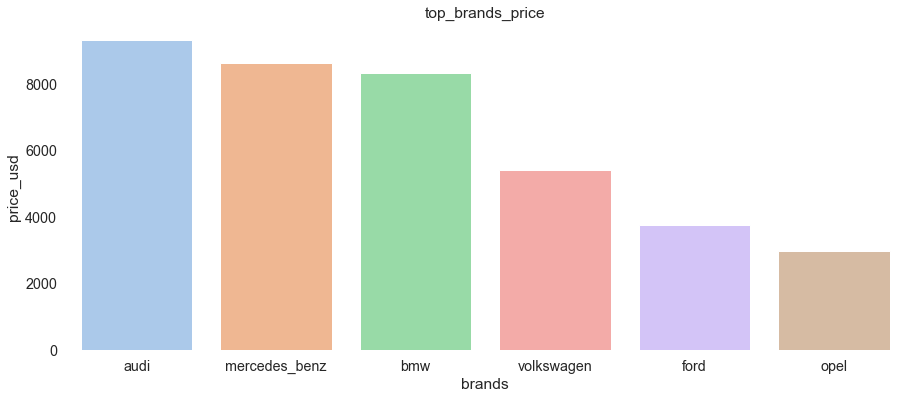

In [51]:
#display top_brands_price in descending order using barplot

fig, ax =plt.subplots(1,1,figsize=(15,6))
plt.title('top_brands_price')
plt.xlabel('brands')
plt.ylabel('price_usd')

keys = list(sorted(top_brands_price, key=top_brands_price.get, reverse=True)) #key sorted by values
vals = [float(top_brands_price[k]) for k in keys] #sorted in descending order

sns.barplot(x=keys, y=vals)
sns.despine(left=True, bottom=True)


**As we can see, among top brands the most expensive is Audi and the cheapest is Opel**

**`top_brands_mileage`**

In [52]:
#using the same aggregation methods as above
top_brands_mileage = {}

for b in top_brands.index:
    selected_rows = autos[autos["brand"] == b ] 
    mean_mileage = selected_rows["odometer_km"].mean()
    top_brands_mileage[b] = int(mean_mileage)

sorted_top_brands_mileage = sorted(top_brands_mileage.items() , reverse=True, key=lambda x: x[1])

for element in sorted_top_brands_mileage :
    print(element[0] , " :" , element[1] )    

bmw  : 132572
mercedes_benz  : 130788
opel  : 129310
audi  : 129157
volkswagen  : 128707
ford  : 124266


**display top_brands_mileage in descending of odometer_km**

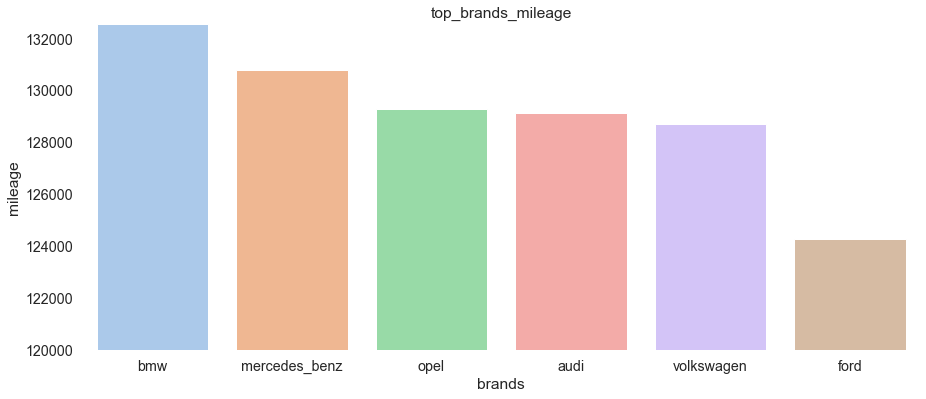

In [53]:
#display top_brands_mileage in descending order using barplot

fig, ax =plt.subplots(1,1,figsize=(15,6))
plt.title('top_brands_mileage')
plt.xlabel('brands')
plt.ylabel('mileage')

keys = list(sorted(top_brands_mileage, key=top_brands_mileage.get, reverse=True)) #key sorted by values
vals = [float(top_brands_mileage[k]) for k in keys] #sorted in descending order

plt.ylim (120000,132572) #we limit the y axis so we can clearly see the difference of mean odometer_km b/w brands
sns.barplot(x=keys, y=vals)
sns.despine(left=True, bottom=True)

**Ah ok, so among top brands the most mileage on average is BMW and the least mileage on average is Ford**

**Alright! So we have figured out the average price and mileage for the top brands using aggregation, next we want to analyze the aggregated data by converting dictionary --> series objects using pandas series constructor**

**`tbp_series`** (top brands price)

In [54]:
tbp_series = pd.Series(top_brands_price).sort_values(ascending=False)
print(tbp_series)

audi             9336
mercedes_benz    8628
bmw              8332
volkswagen       5402
ford             3749
opel             2975
dtype: int64


**`tbm_series`** (top brands mileage)

In [55]:
tbm_series = pd.Series(top_brands_mileage).sort_values(ascending=False)
print(tbm_series)

bmw              132572
mercedes_benz    130788
opel             129310
audi             129157
volkswagen       128707
ford             124266
dtype: int64


**We have convered both dictionaries to series objects using series constructor. The next step is to create a dataframe from both series objects using dataframe constructor so we can easily compare the top brand's mean price & mean mileage**

In [56]:
brand_info = pd.DataFrame(tbp_series, columns = ['mean_price']) #create a dataframe from tbp_series
brand_info['mean_mileage'] = tbm_series #assign tbm_series to a new column

brand_info #pretty print

,mean_price,mean_mileage
audi,9336,129157
mercedes_benz,8628,130788
bmw,8332,132572
volkswagen,5402,128707
ford,3749,124266
opel,2975,129310


If we want to buy a car just by considering the price and mileage, then I'd say **Ford has the best value, because it is the second least expensive car, and has the least amount of mileage on average.**

When looking at the table above, it seems like there is no direct correlation between price and mileage for top brands. For example, Audi is the most expensive car, and yet it is ranked fourth in mileage; Merceedes Benz is the second most expensive car, and it has second most amount of mileage. 

**But really? There is no correlation at all? Maybe since the top brands only make up of 5% of the dataset, then analyzing only the top brands doesn't do the whole dataset justice . I have an idea, let's analyze the whole dataset. We can split the odometer_km (mileage) into groups, and use aggregation to see if average prices follows any patterns based on the mileage.**

Let's do this! I am curious

## Analyzing odometer_km (mileage) column (part 1): Find the relationship beween odometer_km (mileage) and price

Call me stubborn, but I really don't believe that there is no correlation at all between mileage and price. 
<br>**Let's use groupby() to analyze the mileage and price columns for the whole dataset.** See if we get a different result. I wonder...

odometer_km
10000     20550.867220
20000     18448.477089
30000     16608.836842
40000     15499.568381
50000     13812.173212
60000     12385.004433
70000     10927.182814
80000      9721.947636
5000       8873.515924
90000      8465.025105
100000     8132.697279
125000     6214.022030
150000     3767.927107
Name: price_usd, dtype: float64


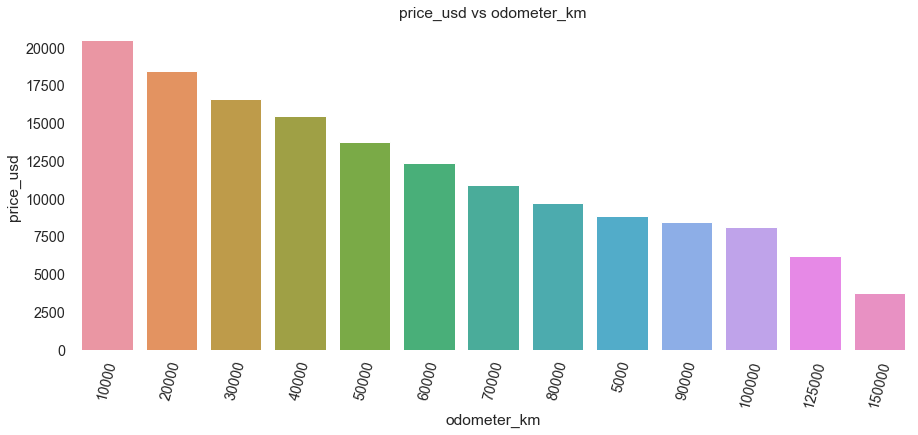

In [57]:
mileage_price = autos.groupby(["odometer_km"])["price_usd"].mean().sort_values(ascending= False)
print(mileage_price)
fig, ax =plt.subplots(1,1,figsize=(15,6))
#sns.set(font_scale=1.3)
plt.title('price_usd vs odometer_km')
plt.xlabel('odometer_km')
sns.barplot(x=sorted(mileage_price.index), y=mileage_price, data=autos, ci=None).set_xticklabels(labels=mileage_price.index,rotation=75)

sns.despine(left=True, bottom=True)

**Tadaa! See?! It appears that the higher the price, the lower the mileage, and vice versa *(odometer: 5000 is an outlier)*. Let's try another method just to make our analysis credible. This time, we are going to split the odometer_km into groups, and use aggregation to see if average prices follows any patterns based on the mileage.**

## Analyzing odometer_km (mileage) column (part 2): Split the odometer_km into groups, and use aggregation to verify the correlation between price and mileage

In [58]:
#splitting odomoter_km into 3 groups
mileage_groups = autos["odometer_km"].value_counts(bins = 3).sort_index(ascending= False)
mileage_groups

(101666.667, 150000.0]     34942
(53333.333, 101666.667]     7421
(4854.999, 53333.333]       4318
Name: odometer_km, dtype: int64

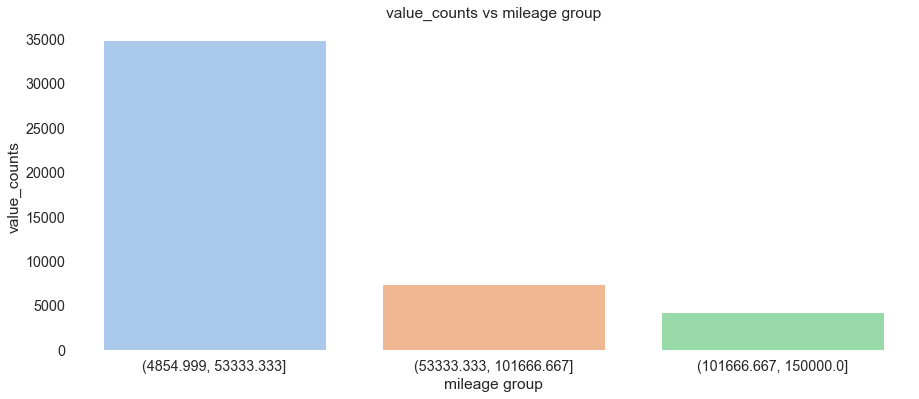

In [59]:
#understanding the distribution of odomoter_km using barplot

fig, ax =plt.subplots(1,1,figsize=(15,6))
plt.title('value_counts vs mileage group')
plt.xlabel('mileage group')
plt.ylabel('value_counts')
sns.barplot(x=mileage_groups.sort_values().
            index, y=mileage_groups.unique(), data=autos, ci=None)

sns.despine(left=True, bottom=True)

odometer_km
(4854.999, 53333.333]      14890.828856
(53333.333, 101666.667]     9595.419350
(101666.667, 150000.0]      4107.938641
Name: price_usd, dtype: float64


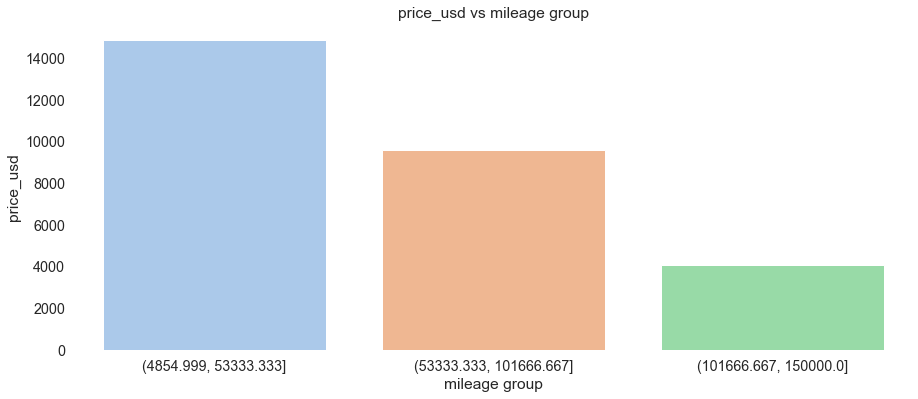

In [60]:
#display using barplot

bins = [4854.999, 53333.333, 101666.667, 150000.0]

mileage_price = autos.groupby(pd.cut(autos["odometer_km"], bins))["price_usd"].mean().sort_values(ascending= False)
print(mileage_price)
fig, ax =plt.subplots(1,1,figsize=(15,6))
#sns.set(font_scale=1.3)
plt.title('price_usd vs mileage group')
plt.xlabel('mileage group')
plt.ylabel('price_usd')
sns.barplot(x=sorted(mileage_price.index), y=mileage_price, data=autos, ci=None)

sns.despine(left=True, bottom=True)

In [61]:
#calculate the mean price of mileage_groups
#using boolean comparison
print('-(101666.667, 150000.0]-')
print('Price = $' + str(round(autos[autos["odometer_km"] >= 101666.667]["price_usd"].mean() )) ) #group 1
print('\n')
print('-(53333.333, 101666.667]-')
print('Price = $' + str(round(autos[autos["odometer_km"].between(53333.333 , 101666.667)]["price_usd"].mean() ))) #group 2
print('\n')
print('-(4854.999, 53333.333]-')
print('Price = $' + str(round(autos[autos["odometer_km"] <= 53333.333]["price_usd"].mean() ))) #group 3

-(101666.667, 150000.0]-
Price = $4108


-(53333.333, 101666.667]-
Price = $9595


-(4854.999, 53333.333]-
Price = $14891


Based on the result above, we get the following:

|mileage_groups| price |
|-|-|
|(101666.667, 150000.0] |\\$4,108 |
||||
|(53333.333, 101666.667]| \\$9,595|
||||
|(4854.999, 53333.333] | \\$14,891|

Wooh! Good that we did this. Turns out if we analyze the whole dataset and grouped the odometer_km column into groups, we find **there is a correlation between price and mileage. As we all can see from the table, the group of cars with higher mileage has lower price, and vice versa.**

Alright alright, so what else can we analyze? let's check the dataset again

In [62]:
autos.head(5) #print the first 5 columns to check what to do next

,date_crawled,name,seller,offer_type,price_usd,ab_test,vehicle_type,registration_year,gearbox,power_ps,...,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen,turnaround_time_days
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,private,offer,5000,control,bus,2004,manual,158,...,150000,3,lpg,peugeot,no,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54,11
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,private,offer,8500,control,limousine,1997,automatic,286,...,150000,6,gas,bmw,no,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08,2
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,private,offer,8990,test,limousine,2009,manual,102,...,70000,7,gas,volkswagen,no,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37,11
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,private,offer,4350,control,small car,2007,automatic,71,...,70000,6,gas,smart,no,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28,3
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,private,offer,1350,test,wagon,2003,manual,0,...,150000,7,gas,ford,no,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50,0


**So in our analysis we have done the following:**

* Analyzed top brands, and find the correlation between price and odometer_km (mileage) between top brands. 
* Analyzed the correlation between odometer_km (mileage) column, and price column in this dataset.

**Let's do a few more analysis to get some more insights!**

## Analyzing brand & model columns (part 1): Find the most common brand/model combinations in this dataset

**Let's find out the most common brand/ model combinations by using groupby( &nbsp;) on brands and the model column**

In [63]:
#using groupby:
#A groupby operation involves some combination of splitting the object, 
#applying a function, and combining the results. 
#This can be used to group large amounts of data and compute operations on these groups.

common_brands_model = autos.groupby(["brand","model"]).size().sort_values(ascending=False).head()
common_brands_model

brand       model 
volkswagen  golf      3707
bmw         3er       2615
volkswagen  polo      1609
opel        corsa     1592
volkswagen  passat    1349
dtype: int64

**Oh wow! The most common brand & model combination is volkswagen golf, with 3707 entries. Interesting.**

## Analyzing brand & model columns (part 2): Find the most common model among top brands

Earlier when analyzing the brand column we managed to get top_brands, which consists of car brands that have a relative frequency > 5% in this dataset. **Let's find the most common model of each brands! In this case we're going to use aggregation (since top_brands is not a column in the DataFrame).**

In [64]:
top_brands.index #just to remind us which brands are included in top_brands

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object')

In [65]:
#aggregation
top_brands_model = {}

for b in top_brands.index:
    selected_rows = autos[autos["brand"] == b ] #boolean comparison
    model = selected_rows["model"]
    top_brands_model[b] = model
    print(str(b) + ': ' + str(top_brands_model[b].value_counts()[[0]]))
    print('\n')

volkswagen: golf    3707
Name: model, dtype: int64


bmw: 3er    2615
Name: model, dtype: int64


opel: corsa    1592
Name: model, dtype: int64


mercedes_benz: c_klasse    1136
Name: model, dtype: int64


audi: a4    1231
Name: model, dtype: int64


ford: focus    762
Name: model, dtype: int64




**Ford focus is the most popular model of Ford brand, but compared to the popular model of other top brands it has the lowest number of entries.** This is not surprising, since Ford is the only American top brand while the other brands in top brands are from German. Note that this dataset is obtained from German ebay, so the result makes sense.

## Analyzing brand & model columns (part 3): Top 3 most expensive used cars

**Let's find out the most expensive cars in this dataset using groupby( &nbsp;) on the model column**

model
911         350000
z_reihe     259000
x_reihe     250000
andere      180000
g_klasse    169999
Name: price_usd, dtype: int64


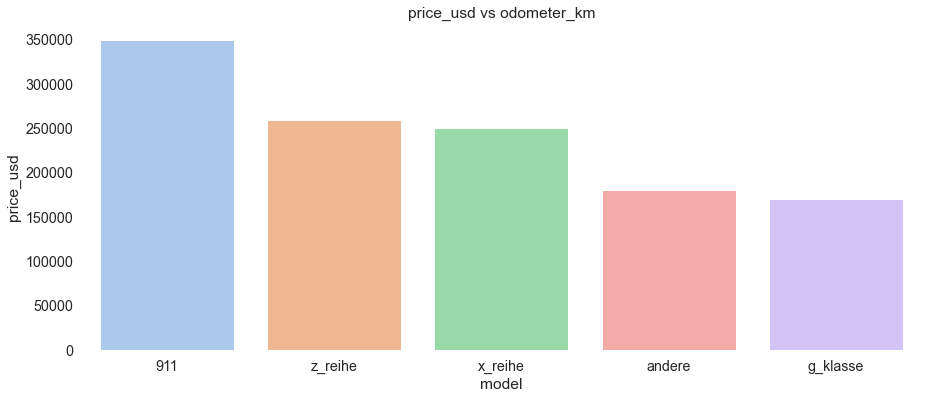

In [66]:
model_price = autos.groupby(["model"])["price_usd"].max().sort_values(ascending= False).head()
print(model_price)
fig, ax =plt.subplots(1,1,figsize=(15,6))
#sns.set(font_scale=1.3)
plt.title('price_usd vs odometer_km')
plt.xlabel('odometer_km')
sns.barplot(x=model_price.index, y=model_price, data=autos, ci=None)

sns.despine(left=True, bottom=True)

**Ok, so the most expensive cars in this dataset is porsche 911, with $350,000. One day I'll buy it! ;D**

Sooo we are almost done with our analysis. We have obtained a lot of insights by analyzing the brand column, and then the Odometer_km (mileage) column. We're almost don... just a few more analysis...

**But before we continue, let's do a little recap again. Here is what we have done on the data analysis section:**

- Brand column
    - Correlation between price and odometer_km (mileage) between top brands. 
- Odometer_km (mileage) column
    - Relationship beween odometer_km (mileage) and price
    - Split the odometer_km into groups, and use aggregation to verify the correlation between price and mileage
- Brand & model columns
    - Most common brand/model combinations in this dataset
    - Most common model among top brands
    - Most expensive used cars

**Alright so next let's check out the average prices of cars per brand in this dataset.**

## Analyzing brand & price_usd columns: Find the priciest & cheapest car brands on average

**`brand_model_price`**

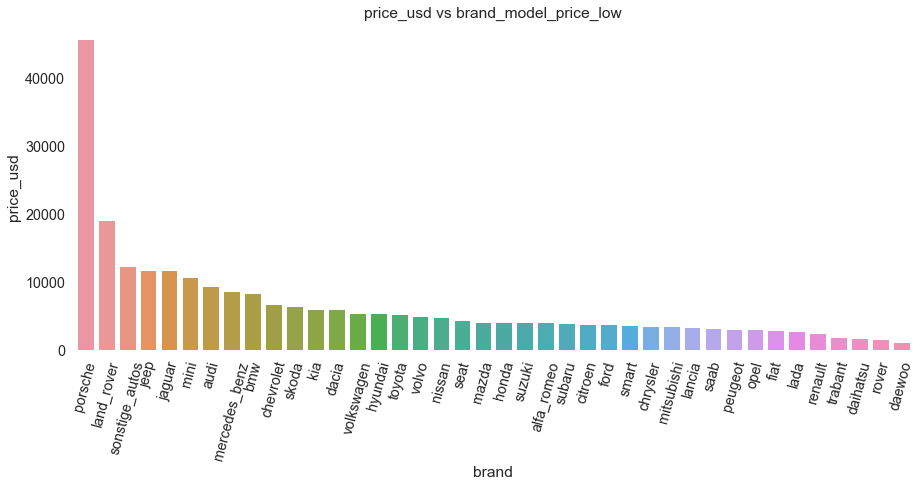

In [67]:
brand_model_price = autos.groupby(["brand"])["price_usd"].mean().sort_values(ascending=False)

fig, ax =plt.subplots(1,1,figsize=(15,6))
#sns.set(font_scale=1.3)
plt.title('price_usd vs brand_model_price_low')
sns.barplot(x=brand_model_price.index, y=brand_model_price, data=autos, ci=None).set_xticklabels(labels=brand_model_price.index,rotation=75)

sns.despine(left=True, bottom=True)

**Yup, this makes sense. The priciest is porsche, and the cheapest is daewoo**

**Next! let's check out brand & turnaround_time_days**

## Analyzing brand & turnaround_time_days columns: Top 3 easiest & hardest car to sell (fastest &slowest turnaround time on average)

**`brand_model_turnaround_short`**

In [68]:
#Top 3 cars with the fastest turnaround
brand_model_turnaround_short = autos.groupby(["brand"])["turnaround_time_days"].mean().sort_values().head(3)
brand_model_turnaround_short

brand
lada        6.333333
daewoo      7.342857
daihatsu    8.205128
Name: turnaround_time_days, dtype: float64

This is really interesting, because I live in the US and as far as I am concerned lada, daewoo, and daihatsu are not considered popular. 
<br>* *CMIIW I am pretty oblivious about cars honestly :P*

**If I have to guess.. I think this has to be related to their price.**

**`brand_model_turnaround_long`**

In [69]:
#Top 3 cars with the slowest turnaround
brand_model_turnaround_long = autos.groupby(["brand"])["turnaround_time_days"].mean().sort_values(ascending=False).head(3)
brand_model_turnaround_long

brand
mini         10.801956
chevrolet    10.379699
subaru       10.310000
Name: turnaround_time_days, dtype: float64

**Mini is the car that takes the longest time to sell on average? I didn't expect this,** since mini is a British brand that has been owned by a German brand, BMW, since 2000. So since this data is obtained from a German eBay, I thought the slowest selling car wouldn't be the one that was owned by a German brand.

As for Chevrolet and Subaru, I'm not really surprised because Chevrolet comes from the US, and Subaru comes from Japan.
<br>* *I'm not saying that German only buy German cars btw. This is only my assumption (since I am ADD and have limited knowledge about cars :P)*

**`brand_model_turnaround`**
<br>**Display brand_model_turnaround in descending order**

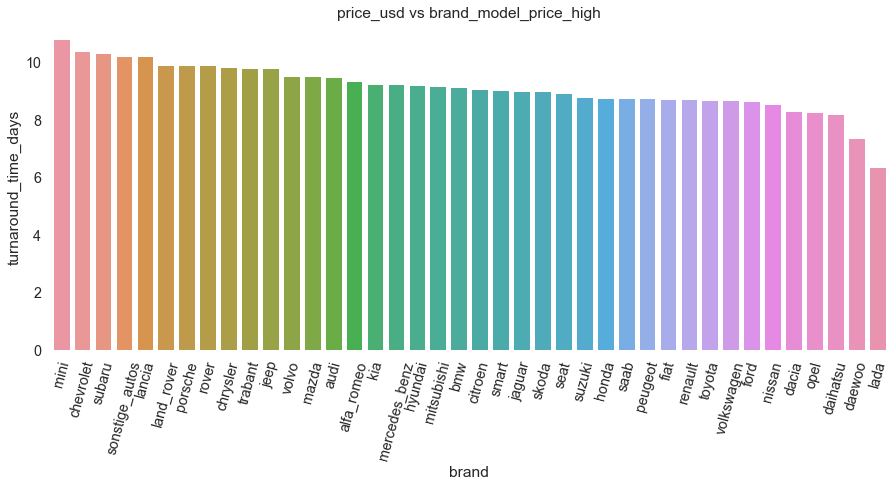

In [70]:
brand_model_turnaround = autos.groupby(["brand"])["turnaround_time_days"].mean().sort_values(ascending=False)

fig, ax =plt.subplots(1,1,figsize=(15,6))
#sns.set(font_scale=1.3)
plt.title('price_usd vs brand_model_price_high')
sns.barplot(x=brand_model_turnaround.index, y=brand_model_turnaround, data=autos, ci=None).set_xticklabels(labels=brand_model_turnaround.index,rotation=75)

sns.despine(left=True, bottom=True)

**Alright so next let's check out the relationship between turnaround_time_days and price_usd .**

## Analyzing turnaround_time_days & price_usd columns: Find the correlation

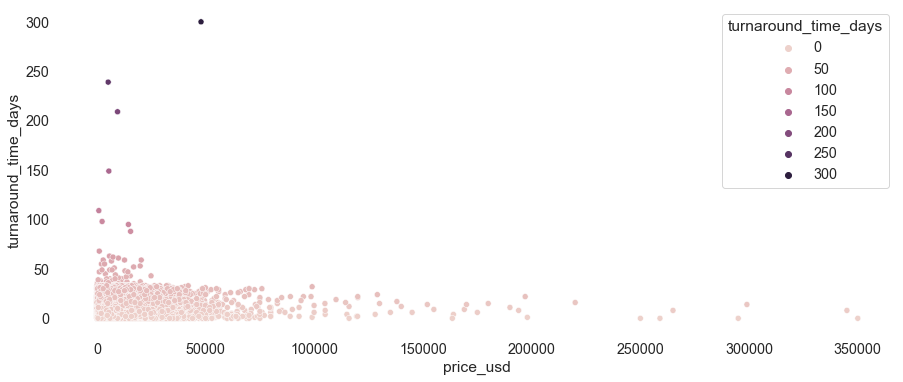

In [71]:
fig, ax =plt.subplots(1,1,figsize=(15,6))
sns.scatterplot(data = autos, x='price_usd', y='turnaround_time_days', hue ='turnaround_time_days')
sns.despine(left=True, bottom=True)
plt.show()

**Based on the plot, we can see that turnaround_time_days decreases as price_usd increases. This indicates that there is a negative correlation between turnaround_time_days, and price_usd.**

Woohoo! Our assumption is correct! Price definitely has an effect on the turnaround time.

Almost done... HAHA I know I've been saying this, but it's hard to stop since we keep getting cool insights. We still have a few unanswered questions, so let's get to it. I swear this is the last time I say 'almost done'

## Analyzing unrepaired_damage: How much cheaper are cars with damage than their non-damaged counterparts?

**Let's find out the the price difference between cars with damage vs non-damaged**

In [72]:
autos.groupby(["unrepaired_damage"])["price_usd"].mean()

unrepaired_damage
no     7164.033103
yes    2241.146035
Name: price_usd, dtype: float64

**Makes total sense. The price of cars without unrepaired damage is higher on average, with $7,164
Next, let's calculate the difference**

unrepaired_damage
no     7164.033103
yes    2241.146035
Name: price_usd, dtype: float64


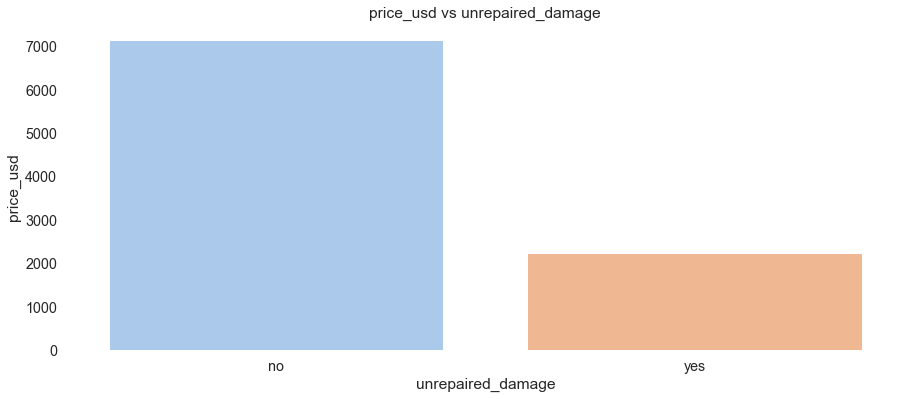

In [73]:
price_damage = autos.groupby(["unrepaired_damage"])["price_usd"].mean()
print(price_damage)
#sns.set_palette("pastel")
#sns.set_style("white")
fig, ax =plt.subplots(1,1,figsize=(15,6))
# sns.set(font_scale=1.3)
plt.title('price_usd vs unrepaired_damage')
sns.barplot(x='unrepaired_damage', y='price_usd', data=autos, ci=None)
sns.despine(left=True, bottom=True)

In [74]:
#Calculating the difference: yes - no
autos.groupby(["unrepaired_damage"])["price_usd"].mean()["yes"] - autos.groupby(["unrepaired_damage"])["price_usd"].mean()["no"]

-4922.887067553713

**Alright so without using calculator we know that the difference is $4,922... neat.**

## Analyzing vehicle_type: What are the top 5 the most expensive vehicle types on average?

**Let's use groupby to find the the most expensive vehicle types on average**


vehicle_type
suv            13407.183715
coupe          11731.207961
convertible    10786.965186
bus             6667.593649
limousine       5958.511510
wagon           5802.211758
other           4457.410256
small car       2746.161077
Name: price_usd, dtype: float64


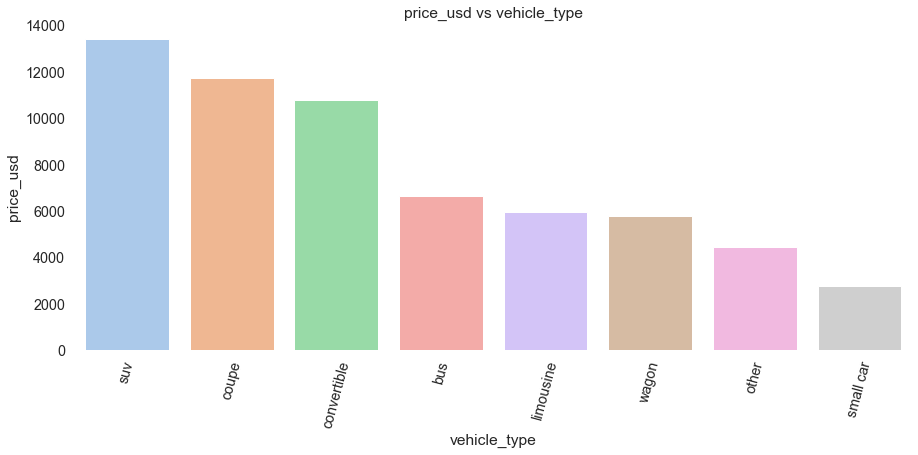

In [75]:
price_vtype = autos.groupby(["vehicle_type"])["price_usd"].mean().sort_values(ascending=False)
print(price_vtype)

#sns.set_palette("pastel")
#sns.set_style("white")

fig, ax =plt.subplots(1,1,figsize=(15,6))
# sns.set(font_scale=1.3)
plt.title('price_usd vs vehicle_type')

sns.barplot(x= price_vtype.index, y=price_vtype, data=autos, ci=None).set_xticklabels(labels=price_vtype.index,rotation=75)
sns.despine(left=True, bottom=True)

**SUV? This is actually unexpected, but ok!**

## Analyzing gearbox: Which one is more expensive? Automatic or manual?

**Of course using common sense we all guess that automatic should be more expensive, but let's check...**

gearbox
automatic    10972.718547
manual        4716.709175
Name: price_usd, dtype: float64


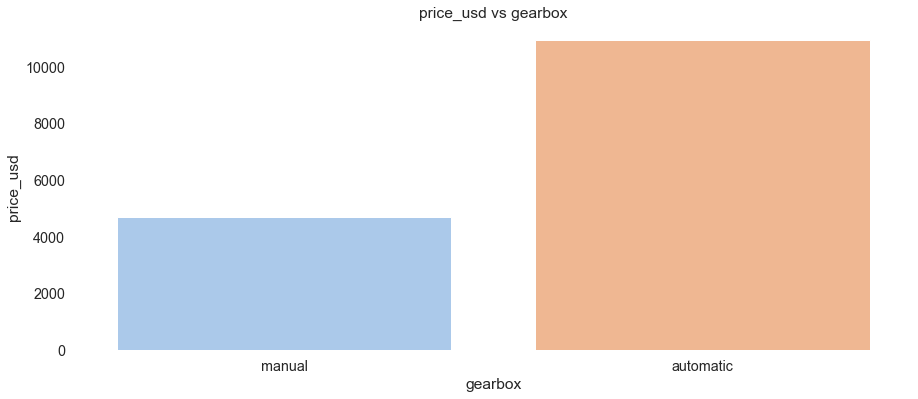

In [76]:
#Calculate the average prices
print(autos.groupby(["gearbox"])["price_usd"].mean())
fig, ax =plt.subplots(1,1,figsize=(15,6))
plt.title('price_usd vs gearbox')

sns.barplot(x='gearbox', y='price_usd', data=autos, ci=None)
sns.despine(left=True, bottom=True)

In [77]:
#Calculate the difference: automatic - manual
autos.groupby(["gearbox"])["price_usd"].mean()["automatic"] - autos.groupby(["gearbox"])["price_usd"].mean()["manual"]

6256.009372369583

**Our guess is right, automatic is $6,256 more expensive!**

## Analyzing fuel_type: What are the cars with the most expensive fuel types on average?

This is going to be our last analysis in this project! Let's find out the average prices of each fuel types and sort it in descending order

fuel_type
electric    24716.368421
hybrid      14346.027027
diesel       8583.889467
gas          5055.093973
cng          4861.478873
lpg          4328.140216
other        2973.866667
Name: price_usd, dtype: float64


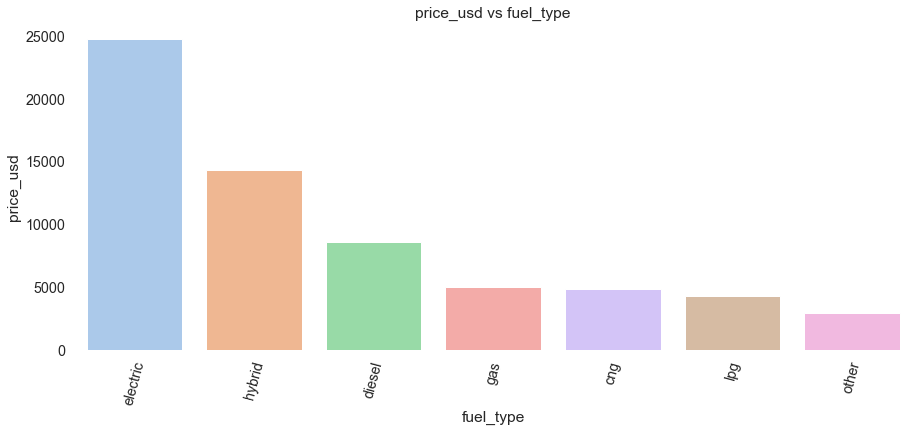

In [78]:
price_ftype = autos.groupby(["fuel_type"])["price_usd"].mean().sort_values(ascending=False)
print(price_ftype)
fig, ax =plt.subplots(1,1,figsize=(15,6))
plt.title('price_usd vs fuel_type')

sns.barplot(x=price_ftype.index, y=price_ftype, data=autos, ci=None).set_xticklabels(labels=price_ftype.index,rotation=75)
sns.despine(left=True, bottom=True)

**Electric cars are the most expensive, which is not surprising at all**

**DONE!!! Alright this is it. Before we jump into conclusion, let's recap on what we have done for our data analysis**

**Data Analysis:**
- Brand column
    - Correlation between price and odometer_km (mileage) between top brands. 
- Odometer_km (mileage) column
    - Relationship beween odometer_km (mileage) and price
    - Split the odometer_km into groups, and use aggregation to verify the correlation between price and mileage
- Brand & model columns
    - Most common brand/model combinations in this dataset
    - Most common model among top brands
    - Most expensive used cars
- Brand & price_usd columns
    - The priciest & cheapest car brands on average
- Brand & turnaround_time_days columns
    - Top 3 easiest & hardest car to sell per brand (fastest &slowest turnaround time on average)
- Turnaround_time_days & price_usd
    - The correlation
- unrepaired_damage column
    - Price difference between cars with damage vs non-damaged
- vehice_type column
    - Average prices of each vehicle type
- gearbox column
    - Average prices of each gearbox category
- fuel_type column
    - Average prices of each vehicle type

# `Conclusion & Insights`
---

Well, that was fun wasn't it? We have explored, cleaned and analyzed the dataset, and now it's time present our insights! **;D**

- On average, cars are usually sold within 0 days, 2 days, or 4 days (in order from most common to least common).
- If we want to buy a car just by considering the price and mileage, Ford has the best value, because it is the second least expensive car, and has the least amount of mileage on average.
- There is a correlation between price and mileage if we analyze the whole dataset. Cars with higher mileage have lower price, and vice versa.
- The most common brand & model combination is volkswagen golf, with 3707 entries
- The top brands in this dataset are: Volkswagen, Bmw, Opel, Mercedes Benz, Audi, and Ford
- Among top brands the most expensive is Audi and the cheapest is Opel
- Among top brands the most mileage on average is BMW and the least mileage on average is Ford
- The most common model among top brands are:
    - Volkswagen Golf
    - Bmw 3er (3 series)
    - Opel Corsa
    - Mercedes-Benz C-klasse (C-Class)
    - Audi A4
    - Ford Focus
- Top 3 most expensive cars
    - Porsche 911
    - BMW Z Reihe (Z Series)
    - BMW X Reihe (X Series)
- Non-damaged cars are \\$4,922 more expensive compared the damaged cars
- The most expensive vehicle types on average is SUV
- Cars with automatic gearbox are $6,256 more expensive compared to cars with manual gearbox
- On average, Electric cars are the most expensive compared to cars with other fuel types


    